# Preparing the data

In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

global_revenue = pd.read_csv('global_revenue.csv')
swiid = pd.read_csv('swiid.csv')

tax = global_revenue[(global_revenue['TAX'] == '5000') & (global_revenue['VAR'] == 'TAXPER') & (global_revenue['Level of government'] == 'Total')]
tax = tax[['COU', 'Country', 'Year', 'Value']].copy()
tax.columns = ['location', 'country', 'year', 'tax']

gini = swiid[['country', 'year', 'gini_disp']].copy()
gini.columns = ['country', 'year', 'gini']

countries = tax.merge(gini, how='inner', on=['country', 'year'])
countries.head()

,location,country,year,tax,gini
0,AUS,Australia,1990,27.824893,29.5
1,AUS,Australia,1991,27.764660,29.6
2,AUS,Australia,1992,28.320173,29.6
3,AUS,Australia,1993,29.502058,29.6
4,AUS,Australia,1994,29.469057,29.6


In [469]:
countries.groupby('year')['country'].nunique()

year
1990    45
1991    48
1992    51
1993    54
1994    56
1995    60
1996    62
1997    64
1998    65
1999    65
2000    70
2001    72
2002    72
2003    72
2004    72
2005    73
2006    72
2007    72
2008    72
2009    72
2010    71
2011    71
2012    70
2013    70
2014    68
2015    63
2016    55
2017    50
2018    26
Name: country, dtype: int64

In [470]:
countries_2005 = countries[countries['year'] == 2005].reset_index(drop=True)[['location', 'country', 'tax', 'gini']].copy()
countries_2005.head()

,location,country,tax,gini
0,AUS,Australia,28.070029,31.8
1,AUT,Austria,29.012264,27.0
2,BEL,Belgium,25.037238,26.5
3,CAN,Canada,25.182227,31.0
4,CZE,Czech Republic,31.200977,25.7


In [471]:
countries_2005[['tax', 'gini']].corr()

,tax,gini
tax,1.00000,0.66217
gini,0.66217,1.00000


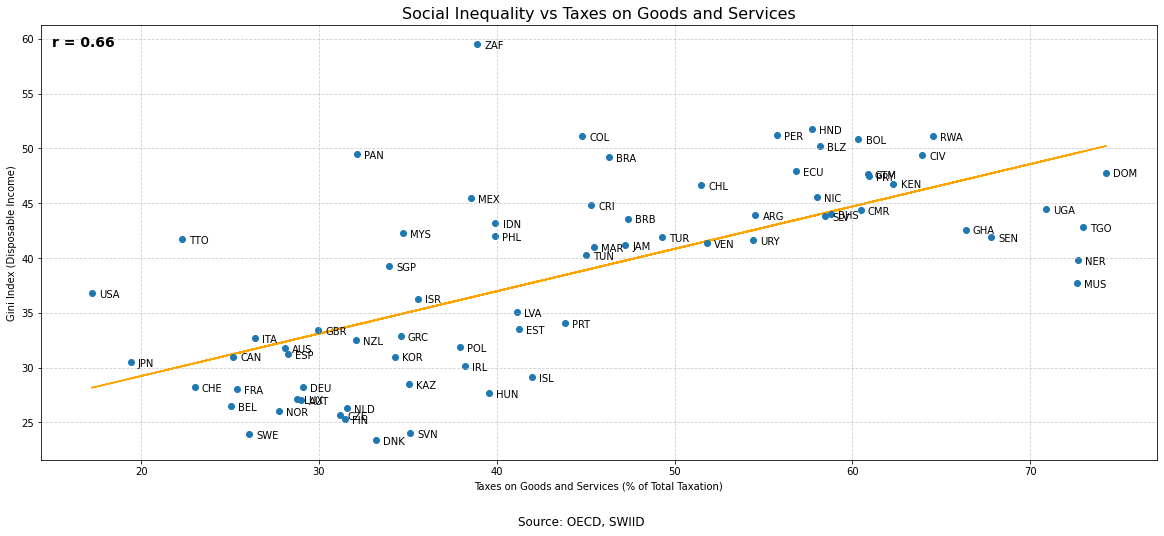

In [472]:
# Sets figure size and grid style
plt.figure(figsize=(20, 8))
plt.grid(alpha=0.6, linestyle='--')

# Creates a scatter plot with our data
plt.scatter(countries_2005['tax'], countries_2005['gini'], zorder=1)

# Adds a trendline to the plot
coeffs = np.polyfit(countries_2005['tax'], countries_2005['gini'], 1)
trendline = np.poly1d(coeffs)
plt.plot(countries_2005['tax'], trendline(countries_2005['tax']), 'orange', zorder=0)

# Writes the respective country code of each point
ax = plt.gca()
for row in countries_2005.itertuples():
    ax.annotate(row.location, (row.tax + 0.4, row.gini - 0.4))

# Adds other texts to the figure
plt.title('Social Inequality vs Taxes on Goods and Services', fontsize=16)
plt.text(0.01, 0.96, 'r = 0.66', ha='left', va='center', fontsize=14, fontweight='bold', transform = ax.transAxes)
plt.figtext(0.5, 0.01, 'Source: OECD, SWIID', wrap=True, ha='center', fontsize=12)
plt.xlabel('Taxes on Goods and Services (% of Total Taxation)')
plt.ylabel('Gini Index (Disposable Income)')

plt.show()